In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install kemlglearn --upgrade
#!pip install scikit-learn --upgrade

# Consensus Clustering

In [2]:
%matplotlib notebook
from sklearn.datasets import load_iris,  make_moons, make_circles
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
from kemlglearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kemlglearn.cluster.consensus import SimpleConsensusClustering
import numpy as np
from numpy.random import normal

import warnings
warnings.filterwarnings('ignore')

data = load_iris()['data']
labels = load_iris()['target']

The `kemlglearn` library has an implementation of a simple consensus algorithm based on the coassociation matrix.

The basis classifier is K-means, it has the following parameters:

* `n_clusters` = Number of clusters
* `n_clusters_base` = Number of clusters to use the base classifier
* `n_components` = Number of components of the consensus
* `ncb_rand` = If the number of clusters of each component is chosen randomly in the interval [ 2..`n_clusters` ]

We will start applying consensus clustering to the iris dataset and we will compare with a single k-means.

Feel free to experiment with the parameters of the consensus to see if there is any improvement respect to the default values for the parameters.



In [3]:
nc = 3
km = KMeans(n_clusters=nc)

cons = SimpleConsensusClustering(n_clusters=nc, n_clusters_base=10, n_components=30, ncb_rand=False)

lkm = km.fit_predict(data)
cons.fit(data)
lcons = cons.labels_

print('K-M AMI =', adjusted_mutual_info_score(labels, lkm))
print('SCC AMI =', adjusted_mutual_info_score(labels, lcons))

K-M AMI = 0.7483723933229485
SCC AMI = 0.7842528489695738


<IPython.core.display.Javascript object>


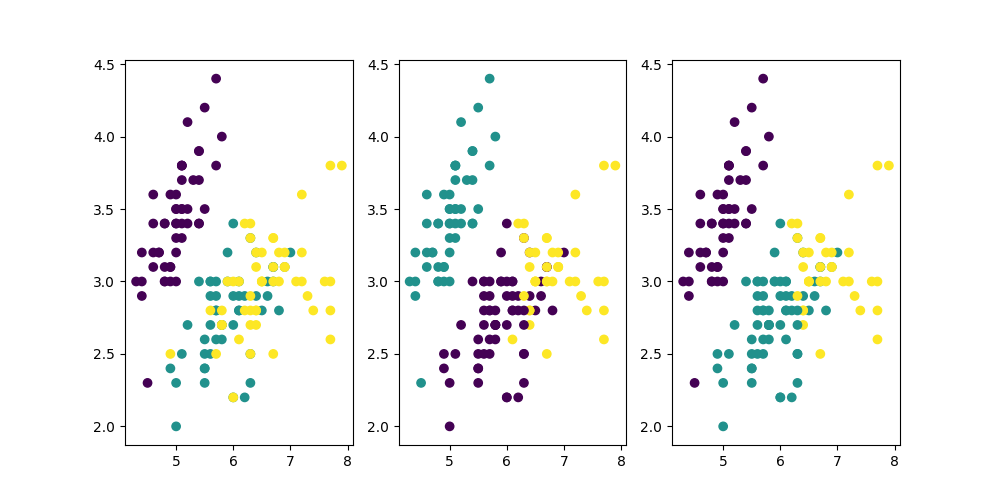

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.scatter(data[:,0],data[:,1],c=labels)
ax = fig.add_subplot(132)
plt.scatter(data[:,0],data[:,1],c=lkm)
ax = fig.add_subplot(133)
plt.scatter(data[:,0],data[:,1],c=lcons);

In [5]:
data, labels = make_blobs(n_samples=[50, 200], n_features=2, centers=[[1,1], [0,0]], random_state=2, cluster_std=[0.1, 0.4])

Now we will apply the consensus clustering to two clusters of different sizes and densities where K-means ususally has difficulties. 

Now you can experiment with the parameters of the consensus but also with the characteristics of the dataset.

In [6]:
nc = 2
km = KMeans(n_clusters=nc)

cons = SimpleConsensusClustering(n_clusters=nc, n_clusters_base=20, n_components=50, ncb_rand=False)

lkm = km.fit_predict(data)
cons.fit(data)
lcons = cons.labels_

print('K-M AMI =', adjusted_mutual_info_score(labels, lkm))
print('SCC AMI  =', adjusted_mutual_info_score(labels, lcons))

K-M AMI = 0.6579365849607263
SCC AMI  = 0.8491015207138605


<IPython.core.display.Javascript object>


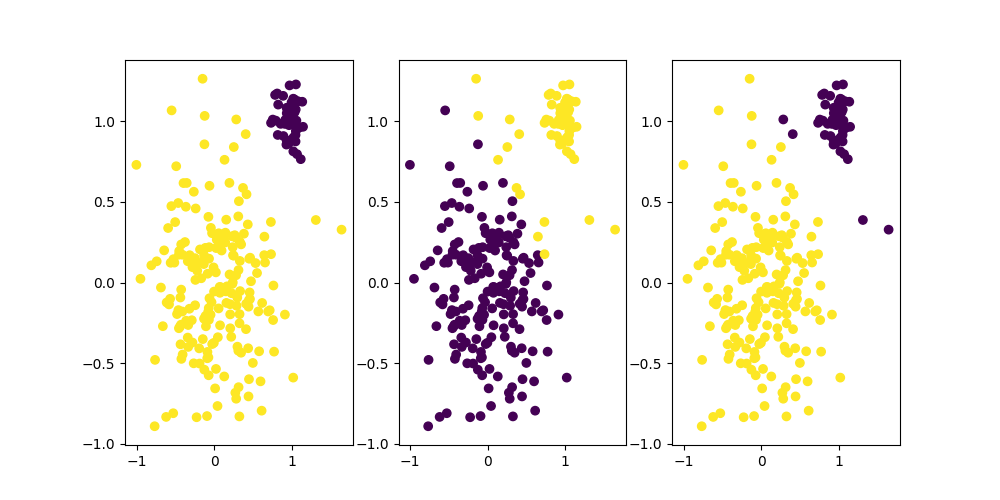

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.scatter(data[:,0],data[:,1],c=labels)
ax = fig.add_subplot(132)
plt.scatter(data[:,0],data[:,1],c=lkm)
ax = fig.add_subplot(133)
plt.scatter(data[:,0],data[:,1],c=lcons);

In [8]:
sc1=100
v1=0.1
sc2=100
v2=0.9

data = np.zeros((sc1+sc2,2))
data[0:sc1, 0] = normal(loc=-0.5, scale=v1, size=sc1)
data[0:sc1, 1] = normal(loc=0.0, scale=v2, size=sc1)
data[sc1:, 0] = normal(loc=0.5, scale=v1, size=sc2)
data[sc1:, 1] = normal(loc=0.0, scale=v2, size=sc2)
labels = np.zeros(sc1+sc2)
labels[sc1:] = 1

Now elongated clusters that are also difficult for K-means

In [9]:
nc = 2
km = KMeans(n_clusters=nc)

cons = SimpleConsensusClustering(n_clusters=nc, n_clusters_base=30, n_components=150, ncb_rand=False)

lkm = km.fit_predict(data)
cons.fit(data)
lcons = cons.labels_

print('K-M AMI =', adjusted_mutual_info_score(labels, lkm))
print('SCC AMI  =', adjusted_mutual_info_score(labels, lcons))

K-M AMI = 0.03509747336138063
SCC AMI  = 0.07194055951970674


<IPython.core.display.Javascript object>


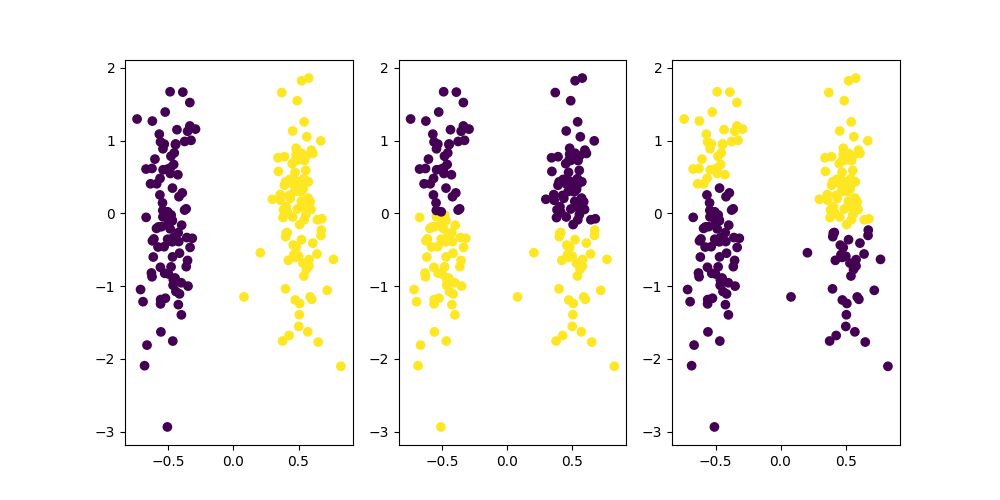

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.scatter(data[:,0],data[:,1],c=labels)
ax = fig.add_subplot(132)
plt.scatter(data[:,0],data[:,1],c=lkm)
ax = fig.add_subplot(133)
plt.scatter(data[:,0],data[:,1],c=lcons);

In [11]:
data, labels = make_circles(n_samples=400, noise=0.1, random_state=4, factor=0.3)

This is the two rings dataset where K-means can not generate the true clusters. 

Feel free to experiment with the parameters of the consensus clustering and the characteristics of the data.

In [12]:
nc = 2
km = KMeans(n_clusters=nc)

cons = SimpleConsensusClustering(n_clusters=nc, n_clusters_base=20, n_components=50, ncb_rand=False)

lkm = km.fit_predict(data)
cons.fit(data)
lcons = cons.labels_

print('K-M AMI =', adjusted_mutual_info_score(labels, lkm))
print('SCC AMI  =', adjusted_mutual_info_score(labels, lcons))

K-M AMI = -0.001361460589666654
SCC AMI  = 1.0


<IPython.core.display.Javascript object>


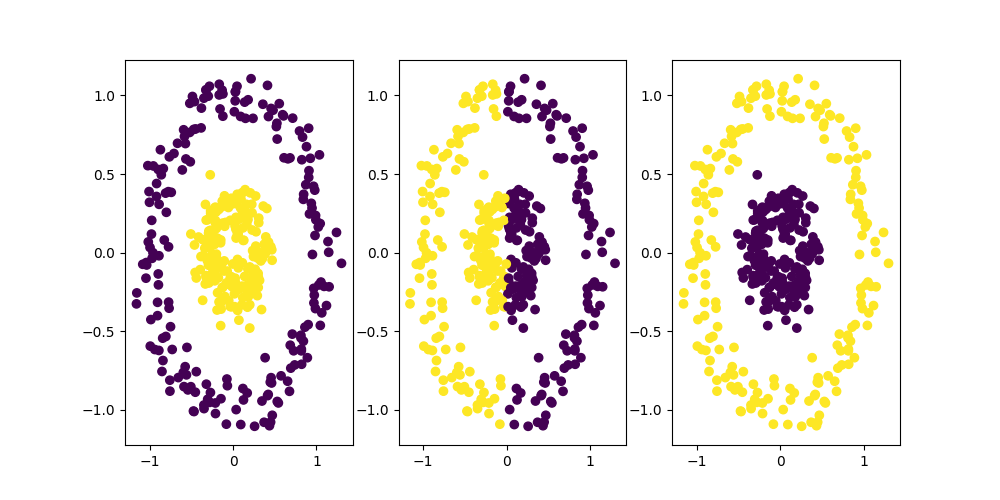

In [13]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.scatter(data[:,0],data[:,1],c=labels)
ax = fig.add_subplot(132)
plt.scatter(data[:,0],data[:,1],c=lkm)
ax = fig.add_subplot(133)
plt.scatter(data[:,0],data[:,1],c=lcons);

In [14]:
data, labels = make_moons(n_samples=250, noise=0.1)

This is the two moons dataset, it is more dificult than the previous ones.

In this case it is difficult to find good parameters that separate well both classes.

In [15]:
nc = 2
km = KMeans(n_clusters=nc)

cons = SimpleConsensusClustering(n_clusters=nc, n_clusters_base=15, n_components=150, ncb_rand=False)

lkm = km.fit_predict(data)
cons.fit(data)
lcons = cons.labels_

print('K-M AMI =', adjusted_mutual_info_score(labels, lkm))
print('SCC AMI  =', adjusted_mutual_info_score(labels, lcons))

K-M AMI = 0.17701863942346016
SCC AMI  = 0.2738082698763374


<IPython.core.display.Javascript object>


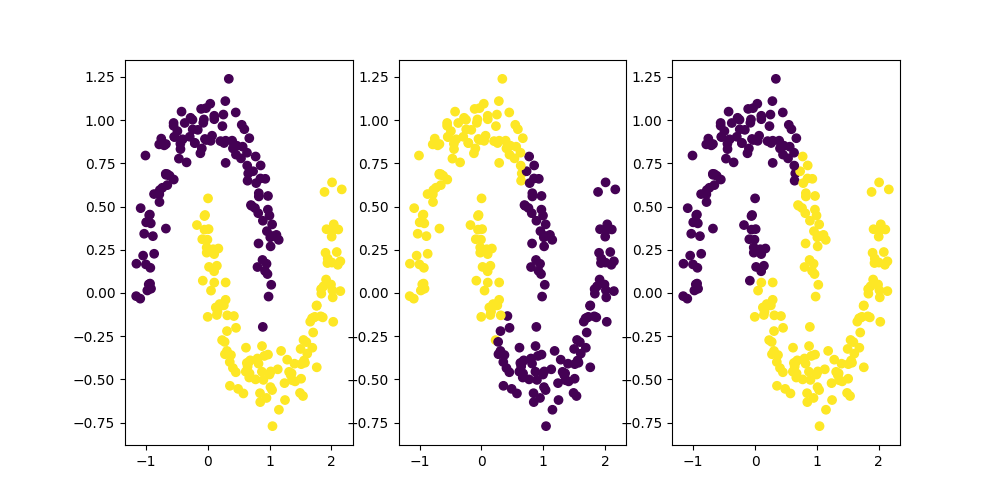

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.scatter(data[:,0],data[:,1],c=labels)
ax = fig.add_subplot(132)
plt.scatter(data[:,0],data[:,1],c=lkm)
ax = fig.add_subplot(133)
plt.scatter(data[:,0],data[:,1],c=lcons);